# Importing Libraries

In [1]:
import torch
import torch.nn as nn

In [7]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [5]:
torch.__version__

'2.0.1'

In [2]:
import opendatasets as od
from pathlib import Path

# importing dataset and setting device to gpu

In [ ]:
od.download("https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

In [10]:
train_dir = Path('gtsrb-german-traffic-sign/Train')
test_dir = Path('gtsrb-german-traffic-sign/Test')

train_dir, test_dir

(PosixPath('gtsrb-german-traffic-sign/Train'),
 PosixPath('gtsrb-german-traffic-sign/Test'))

In [3]:
device = "mps"

In [32]:
device

'mps'

# Transforming dataset and importing model

In [8]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [11]:
from torchvision import datasets

data = datasets.ImageFolder(root = train_dir,
                                 transform = data_transform)


In [12]:
out_classes = data.classes
len(out_classes)

43

In [13]:
train_size = int(0.8*len(data))
test_size = len(data)-train_size
train_data, test_data = torch.utils.data.random_split(data, [train_size,test_size])

In [14]:
print(f"Train data:\n{train_data}\n")

Train data:



In [15]:
len(data)

39209

In [16]:
len(train_data), len(test_data)

(31367, 7842)

In [17]:
img, label = train_data[3001][0], train_data[3001][1]
print(img.shape)
print(img.dtype)
print(label)

torch.Size([3, 224, 224])
torch.float32
9


In [18]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data,
                    batch_size = 32,
                    shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                    batch_size = 32,
                    shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x16ad3d270>,
 <torch.utils.data.dataloader.DataLoader at 0x16ad3c4f0>)

In [19]:
img, label = next(iter(train_dataloader))
print(img.shape)
print(label)

torch.Size([32, 3, 224, 224])
tensor([ 5, 23, 24, 10,  4,  3,  5, 42,  5,  5, 42, 33, 38, 20, 29,  8, 41, 42,
        19, 40,  2,  8,  1, 12, 12,  7, 37,  3, 32, 33, 41, 24])


In [20]:
from torchvision.models import resnet18

In [49]:
model_resnet = resnet18()
model_resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [50]:
model_resnet.fc = nn.Linear(512,len(out_classes)).to(device)

In [41]:
model_resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Model summary 

In [43]:
from torchinfo import summary
#model0 = model_resnet(3,43)
summary(model_resnet, input_size = [1,3,224,224])

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 43]                   --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

# training and testing 

In [44]:
def train_step(model: torch.nn.Module,
         data: torch.utils.data.DataLoader,
         loss_fn: torch.nn.Module, 
         optimizer: torch.optim.Optimizer):
    
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X,y) in enumerate(data):
        
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(data)
    train_acc = train_acc / len(data)
    return train_loss, train_acc

In [45]:
def test_step(model: torch.nn.Module, 
              data: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):

    model.eval() 
    

    test_loss, test_acc = 0, 0
    
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(data):
            
            X, y = X.to(device), y.to(device)
                
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            
            test_pred_class = test_pred.argmax(dim=1)
            test_acc += ((test_pred_class == y).sum().item()/len(test_pred_class))
            
    test_loss = test_loss / len(data)
    test_acc = test_acc / len(data)
    return test_loss, test_acc

In [47]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module, 
          train_data: torch.utils.data.DataLoader, 
          test_data: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):
    
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                            data=train_data,
                                            loss_fn=loss_fn,
                                            optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                data=test_data,
                loss_fn=loss_fn)
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
                )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [51]:
torch.manual_seed(21) 

model = model_resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_resnet.parameters(), lr=0.005)

from timeit import default_timer as timer 
start_time = timer()

model_results = train(model=model, 
                        train_data=train_dataloader,
                        test_data=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=5)
                       

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

 20%|████████▊                                   | 1/5 [02:22<09:28, 142.11s/it]

Epoch: 1 | train_loss: 2.3150 | train_acc: 0.3190 | test_loss: 1.1756 | test_acc: 0.6040


 40%|█████████████████▌                          | 2/5 [04:42<07:04, 141.34s/it]

Epoch: 2 | train_loss: 0.4947 | train_acc: 0.8327 | test_loss: 0.2702 | test_acc: 0.9019


 60%|██████████████████████████▍                 | 3/5 [07:10<04:48, 144.12s/it]

Epoch: 3 | train_loss: 0.1496 | train_acc: 0.9500 | test_loss: 0.1777 | test_acc: 0.9426


 80%|███████████████████████████████████▏        | 4/5 [09:37<02:25, 145.23s/it]

Epoch: 4 | train_loss: 0.0880 | train_acc: 0.9711 | test_loss: 0.1508 | test_acc: 0.9541


100%|████████████████████████████████████████████| 5/5 [12:04<00:00, 144.88s/it]

Epoch: 5 | train_loss: 0.0703 | train_acc: 0.9767 | test_loss: 0.0751 | test_acc: 0.9754
Total training time: 724.388 seconds


# GradCAM

In [52]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 4.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 6.0 MB/s eta 0:00:0000:0100:01
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38247 sha256=94078c3054e32fe4409313f0d310c00e1b30bf79b018d5a665289cf719a6eb20
  Stored in directory: /Users/being_manav/Library/Caches/pip/wheels/17/3d/6a/ccba262e99e4fdc1a5b859c8e4badff4fcf76799fecd6fc03d
Successfully built grad-cam


In [53]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [55]:
from PIL import Image
from pathlib import Path
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [56]:
transform_gc = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

torch.Size([1, 3, 224, 224])


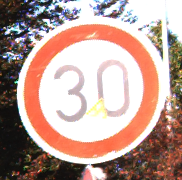

In [66]:
target_layers = [model_resnet.layer4[-1]]

img_path = Path("gtsrb-german-traffic-sign/Test/10841.png")

input_img = Image.open(img_path)

input_tensor = transform_gc(input_img)
#change 3d tensor to 4d tensor
input_tensor_cam = input_tensor[None,:,:,:]

print(input_tensor_cam.shape)
input_img

In [67]:
device

'mps'

In [68]:
# gradCam model for a specific layer but can use any image
cam = GradCAM(model = model_resnet, target_layers = target_layers)


targets = [ClassifierOutputTarget(1)]


grayscale_cam = cam(input_tensor=input_tensor_cam.to(device), targets=targets)


grayscale_cam = grayscale_cam[0, :]

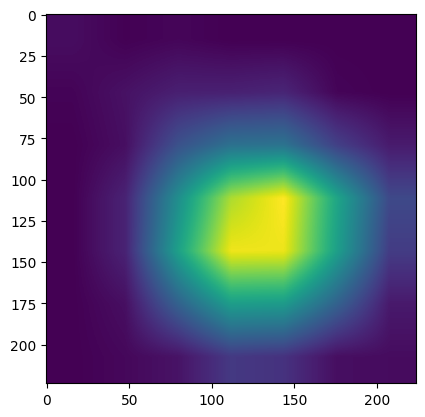

In [69]:
import matplotlib.pyplot as plt

plt.imshow(grayscale_cam)

#show_img2(img_resized, grayscale, alpha=0.8)